In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def WS(N, k, beta):

    WS = nx.Graph()

    nodes = np.arange(0, N).astype(int)

    links = np.zeros((N,k)).astype(int)
    md = k%2

#     links = np.array([[node, i] for node in nodes for i in range(node - k//2 - md, node + 1 + k//2) if i != node])
    links = [[node, i%N] for node in nodes for i in range(node+1, node + k//2 + 1)]
    WS.add_edges_from(links)
    nw = set()

    for node in nodes:
        neighbors = set(WS.neighbors(node))
        
        for ngb in neighbors:
            if np.random.rand() < beta:
                WS.remove_edge(node, ngb)
                c = np.random.choice(nodes)
                while c == node or c in neighbors or (node, c) in nw:
                    c = np.random.choice(nodes)
                nw.add((node, c))

    
    WS.add_edges_from(nw)
    
    return WS


In [13]:
p_results = {4:[]}
c_results = {4:[]}
beta = 1

for k in [4]:
    for N in np.linspace(100, 1000, 10).astype(int):
        ws = WS(N, k, beta)
        sp = nx.shortest_path(ws)
        
        dists = []
        longest = 0
        count = 0
        for node_paths in sp.values():
            
            for path in node_paths.values():
                count += len(path)-1
                if len(path) > longest:
                    longest = len(path)-1
        dists.append(
            count
        )       
        
        p_results[k].append([count, N, longest])
    

In [14]:
p_c = []

for i in p_results[4]:
    p_c.append(i[0]/(i[1]*(i[1]-1)))
#     p_c.append(np.mean(i[0]))
p_c

[3.5214141414141413,
 4.000603015075377,
 4.341605351170569,
 4.581691729323309,
 4.7603446893787575,
 4.89983305509182,
 5.034171265072553,
 5.171326658322903,
 5.254517364973427,
 5.323161161161162]

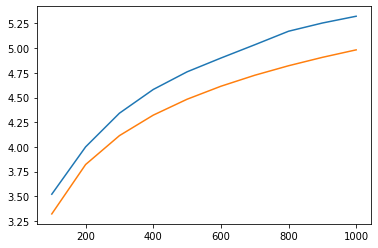

In [15]:
plt.plot(np.linspace(100, 1000, 10), p_c)
plt.plot(np.linspace(100, 1000, 10), [np.log(i)/np.log(4) for i in np.linspace(100, 1000, 10)])

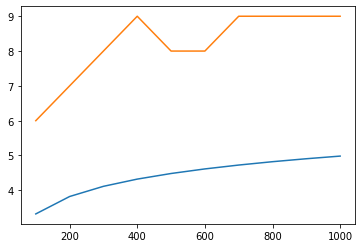

In [32]:
plt.plot(np.linspace(100, 1000, 10), [np.log(i)/np.log(4) for i in np.linspace(100, 1000, 10)])
plt.plot(np.linspace(100, 1000, 10), [p_results[4][i][2] for i in range(len(p_results[4]))])